ЛОЖНЫЕ И ПРАВИЛЬНЫЕ СРАБАТЫВАНИЯ

In [1]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import cv2
import os 


Подгрузка картинок


In [2]:
imgs_path = "C:\\Users\\imotw\\PycharmProjects\\diplom_matvey\\skel_db\\"
imgs = os.listdir(imgs_path)
imgs_list = []
for img in imgs:
    scr = cv2.imread((imgs_path + img), 0)
    imgs_list.append(scr)
    
lsorted = sorted(imgs,key=lambda x: int(os.path.splitext(x)[0])) 

print(lsorted)


['20.bmp', '21.bmp', '22.bmp', '23.bmp', '24.bmp', '30.bmp', '31.bmp', '32.bmp', '33.bmp', '34.bmp', '40.bmp', '41.bmp', '42.bmp', '43.bmp', '44.bmp', '50.bmp', '51.bmp', '52.bmp', '53.bmp', '54.bmp', '60.bmp', '61.bmp', '62.bmp', '63.bmp', '64.bmp', '70.bmp', '71.bmp', '72.bmp', '73.bmp', '74.bmp', '80.bmp', '81.bmp', '82.bmp', '83.bmp', '84.bmp', '90.bmp', '91.bmp', '92.bmp', '93.bmp', '94.bmp', '100.bmp', '101.bmp', '102.bmp', '103.bmp', '104.bmp', '110.bmp', '111.bmp', '112.bmp', '113.bmp', '114.bmp', '120.bmp', '121.bmp', '122.bmp', '123.bmp', '124.bmp', '130.bmp', '131.bmp', '132.bmp', '133.bmp', '134.bmp', '140.bmp', '141.bmp', '142.bmp', '143.bmp', '144.bmp', '150.bmp', '151.bmp', '152.bmp', '153.bmp', '154.bmp', '160.bmp', '161.bmp', '162.bmp', '163.bmp', '164.bmp', '170.bmp', '171.bmp', '172.bmp', '173.bmp', '174.bmp', '180.bmp', '181.bmp', '182.bmp', '183.bmp', '184.bmp', '190.bmp', '191.bmp', '192.bmp', '193.bmp', '194.bmp', '200.bmp', '201.bmp', '202.bmp', '203.bmp', '204.

Сравнение фоток

ORB descriptor

In [9]:
import itertools

orb = cv2.ORB_create()
matches = {}

for i in lsorted[:50]:

    img1 = cv2.imread(imgs_path + i, 0)
    keypoints1, descriptors1 = orb.detectAndCompute(img1, None)
    _ = []
    
    for j in lsorted[:50]:
        good_matches = []
        img2 = cv2.imread(imgs_path + j, 0)
        keypoints2, descriptors2 = orb.detectAndCompute(img2, None)
        bf = cv2.BFMatcher_create(cv2.NORM_HAMMING,crossCheck=True)
        match = bf.match(descriptors1, descriptors2)
        good_matches.append(len(match))
        _.append(good_matches[0])
    matches.update({i: _})
matches

{'20.bmp': [500,
  134,
  137,
  128,
  133,
  123,
  113,
  132,
  121,
  120,
  127,
  122,
  127,
  121,
  120,
  113,
  123,
  118,
  129,
  131,
  136,
  130,
  124,
  134,
  123,
  111,
  120,
  110,
  103,
  115,
  114,
  116,
  128,
  121,
  120,
  113,
  113,
  121,
  115,
  130,
  124,
  129,
  124,
  117,
  104,
  109,
  112,
  113,
  118,
  121],
 '21.bmp': [134,
  500,
  136,
  143,
  145,
  123,
  113,
  123,
  112,
  112,
  120,
  120,
  113,
  121,
  99,
  119,
  114,
  120,
  123,
  116,
  111,
  119,
  129,
  109,
  115,
  103,
  111,
  106,
  110,
  109,
  122,
  116,
  109,
  117,
  111,
  134,
  128,
  119,
  104,
  131,
  115,
  107,
  124,
  124,
  111,
  120,
  103,
  111,
  134,
  124],
 '22.bmp': [137,
  136,
  500,
  130,
  131,
  130,
  128,
  133,
  122,
  126,
  132,
  127,
  116,
  121,
  122,
  117,
  120,
  123,
  121,
  137,
  126,
  116,
  115,
  120,
  124,
  109,
  128,
  111,
  113,
  111,
  129,
  130,
  123,
  121,
  136,
  118,
  114,
  129,
  1

In [ ]:
print(matches)

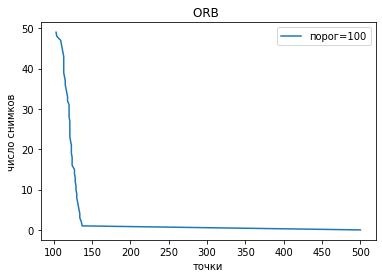

In [42]:
pororg_1 = 100
plot_arr = []
for i in matches.get(lsorted[0]):
    if i >= pororg_1:
        plot_arr.append(i)
plot_arr.sort(reverse=True)
plt.plot(plot_arr, range(50), label='порог=100')
plt.xlabel('точки')
# naming the y axis
plt.ylabel('число снимков')
# giving a title to my graph
plt.title('ORB ')
# show a legend on the plot
plt.legend()
# function to show the plot
plt.show()

In [ ]:
orb = cv2.ORB_create()
matches = []
for i in len(imgs):
    keypoints, descriptors1 = orb.detectAndCompute(imgs[i], None)
    for j in len(imgs):
        keypoints2, descriptors2 = orb.detectAndCompute(imgs[j], None)

        bf = cv2.BFMatcher_create(cv2.NORM_HAMMING,crossCheck=True)
        match = bf.match(descriptors1, descriptors2)

        matches.append(len(match))

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


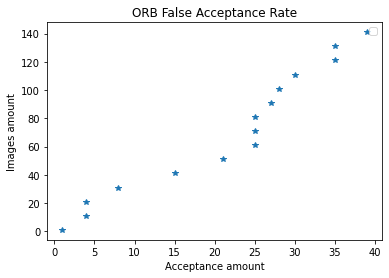

In [27]:
orb = cv2.ORB_create()
keypoints1, descriptors1 = orb.detectAndCompute(cv2.imread(imgs_list[5], 0), None)
descriptors = []
matches = []

FARs = []
good_matches = []
lens =range(1, 150, 10)
for i in lens:
    count = 0
    for img in imgs_list[5:(5+i)]:
        
        keypoints, descriptors = orb.detectAndCompute(cv2.imread(img, 0), None)
        bf = cv2.BFMatcher_create(cv2.NORM_HAMMING,crossCheck=True)
        match = bf.match(descriptors1, descriptors)
        match
        for m1 in match:
            if m1.distance < 15:
                good_matches.append(m1)
        if len(good_matches) >= 10:
            count += 1
        good_matches.clear()
    FARs.append(count)

plt.plot(FARs, lens, '*')
  
# naming the x axis
plt.xlabel('Acceptance amount')
# naming the y axis
plt.ylabel('Images amount')
# giving a title to my graph
plt.title('ORB False Acceptance Rate')
# show a legend on the plot
plt.legend()
# function to show the plot
plt.show()

{'20.bmp': None,
 '21.bmp': None,
 '22.bmp': None,
 '23.bmp': None,
 '24.bmp': None,
 '30.bmp': None,
 '31.bmp': None,
 '32.bmp': None,
 '33.bmp': None,
 '34.bmp': None,
 '40.bmp': None,
 '41.bmp': None,
 '42.bmp': None,
 '43.bmp': None,
 '44.bmp': None,
 '50.bmp': None,
 '51.bmp': None,
 '52.bmp': None,
 '53.bmp': None,
 '54.bmp': None,
 '60.bmp': None,
 '61.bmp': None,
 '62.bmp': None,
 '63.bmp': None,
 '64.bmp': None,
 '70.bmp': None,
 '71.bmp': None,
 '72.bmp': None,
 '73.bmp': None,
 '74.bmp': None,
 '80.bmp': None,
 '81.bmp': None,
 '82.bmp': None,
 '83.bmp': None,
 '84.bmp': None,
 '90.bmp': None,
 '91.bmp': None,
 '92.bmp': None,
 '93.bmp': None,
 '94.bmp': None,
 '100.bmp': None,
 '101.bmp': None,
 '102.bmp': None,
 '103.bmp': None,
 '104.bmp': None,
 '110.bmp': None,
 '111.bmp': None,
 '112.bmp': None,
 '113.bmp': None,
 '114.bmp': None}

In [34]:

import itertools

orb = cv2.ORB_create()
#keypoints1, descriptors1 = orb.detectAndCompute(imgs_list[0], None)
descriptors = []
matches = []


keypoints_f, descriptors_f = orb.detectAndCompute(imgs_list[0], None)
keypoints_f1, descriptors_f1 = orb.detectAndCompute(imgs_list[0], None)
bf = cv2.BFMatcher_create(cv2.NORM_HAMMING,crossCheck=True)
match = bf.match(descriptors_f, descriptors_f1)
max_value = len(match)

FARs = []
good_matches = []
lens = range(50)

count = 0
for img1, img2 in itertools.combinations(imgs_list[4:54], 2):
    keypoints1, descriptors1 = orb.detectAndCompute(img1, None)
    keypoints2, descriptors2 = orb.detectAndCompute(img2, None)
    bf = cv2.BFMatcher_create(cv2.NORM_HAMMING,crossCheck=True)

    match = bf.match(descriptors1, descriptors2)

    matches.append(len(match))

matches

[106,
 116,
 113,
 110,
 112,
 104,
 95,
 111,
 94,
 110,
 128,
 117,
 110,
 119,
 117,
 115,
 118,
 121,
 118,
 123,
 113,
 113,
 101,
 93,
 104,
 96,
 96,
 103,
 102,
 91,
 99,
 102,
 122,
 110,
 112,
 108,
 106,
 92,
 108,
 111,
 111,
 121,
 89,
 96,
 110,
 104,
 87,
 82,
 102,
 167,
 166,
 157,
 156,
 139,
 125,
 123,
 123,
 117,
 100,
 112,
 124,
 96,
 97,
 112,
 117,
 114,
 114,
 113,
 102,
 112,
 113,
 126,
 109,
 107,
 109,
 123,
 123,
 113,
 126,
 122,
 131,
 115,
 115,
 132,
 124,
 128,
 124,
 119,
 121,
 111,
 118,
 120,
 113,
 109,
 123,
 113,
 118,
 163,
 157,
 152,
 102,
 110,
 109,
 123,
 117,
 118,
 121,
 103,
 105,
 115,
 108,
 114,
 121,
 110,
 99,
 121,
 110,
 109,
 110,
 124,
 118,
 115,
 115,
 120,
 127,
 126,
 100,
 130,
 127,
 111,
 134,
 113,
 130,
 121,
 115,
 123,
 124,
 121,
 112,
 108,
 112,
 114,
 118,
 120,
 164,
 167,
 125,
 126,
 129,
 116,
 113,
 113,
 101,
 110,
 111,
 111,
 105,
 119,
 119,
 116,
 126,
 105,
 107,
 116,
 106,
 121,
 125,
 125,
 126,
 

In [106]:
max_value

500

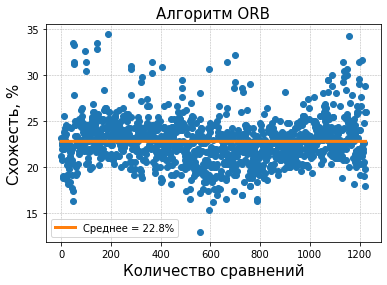

In [35]:


orb_FAR = [(i/max_value)*100 for i in matches]
y_mean = [np.mean(orb_FAR)]*len(orb_FAR)


fig = plt.figure()
# Plot the data
plt.plot(orb_FAR, 'o')
plt.plot(y_mean, label=f'Среднее = {float("{:.2f}".format(y_mean[0]))}%',linewidth=3)
# Plot the average line
#plt.plot(orb_FAR,y_mean, label='Mean', linestyle='--')

#plt.locator_params(nbins = 6)
plt.grid( linestyle='--', linewidth=0.5)
# Plot the average line
#plt.plot(orb_FAR,y_mean, label='Mean', linestyle='--')

#plt.locator_params(nbins = 6)
#plt.rcParams["figure.figsize"] = (5, 8)
  
# naming the x axis
plt.ylabel('Схожесть, %' ,fontsize= 15)
# naming the y axis
plt.xlabel('Количество сравнений',fontsize= 15)
# giving a title to my graph
plt.title('Алгоритм ORB',fontsize= 15)
# show a legend on the plot
plt.legend()
# function to show the plot
plt.show()
fig.savefig('ORB_g.png', dpi = 150, facecolor='white')

In [33]:
y_mean

[23.166183574879227,
 23.166183574879227,
 23.166183574879227,
 23.166183574879227,
 23.166183574879227,
 23.166183574879227,
 23.166183574879227,
 23.166183574879227,
 23.166183574879227,
 23.166183574879227,
 23.166183574879227,
 23.166183574879227,
 23.166183574879227,
 23.166183574879227,
 23.166183574879227,
 23.166183574879227,
 23.166183574879227,
 23.166183574879227,
 23.166183574879227,
 23.166183574879227,
 23.166183574879227,
 23.166183574879227,
 23.166183574879227,
 23.166183574879227,
 23.166183574879227,
 23.166183574879227,
 23.166183574879227,
 23.166183574879227,
 23.166183574879227,
 23.166183574879227,
 23.166183574879227,
 23.166183574879227,
 23.166183574879227,
 23.166183574879227,
 23.166183574879227,
 23.166183574879227,
 23.166183574879227,
 23.166183574879227,
 23.166183574879227,
 23.166183574879227,
 23.166183574879227,
 23.166183574879227,
 23.166183574879227,
 23.166183574879227,
 23.166183574879227,
 23.166183574879227,
 23.166183574879227,
 23.166183574

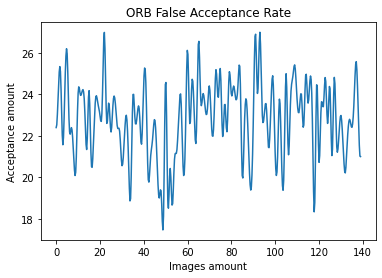

In [76]:
from scipy.interpolate import make_interp_spline
import matplotlib.pyplot as plt
lens = range(140)
# Dataset
orb_x = np.array(lens)
orb_y = np.array(orb_FAR)
 
orb_X_Y_Spline = make_interp_spline(orb_x, orb_y)
 
# Returns evenly spaced numbers
# over a specified interval.
orb_X_ = np.linspace(orb_x.min(), orb_x.max(), 500)
orb_Y_ = orb_X_Y_Spline(orb_X_)
 
# Plotting the Graph
plt.plot(orb_X_, orb_Y_)
plt.ylabel('Acceptance amount')
# naming the y axis
plt.xlabel('Images amount')
# giving a title to my graph
plt.title('ORB False Acceptance Rate')
plt.show()

SIFT DESCRIPTOR
    

In [135]:
sift = cv2.xfeatures2d.SIFT_create()
keypoints1, descriptors1 = sift.detectAndCompute(imgs_list[0], None)
match = bf.knnMatch(descriptors1, descriptors1, k=2)
for m1, m2 in match:
    if m1.distance < 0.5*m2.distance:
        good_matches.append(m1)
sift_max_value = len(good_matches)

descriptors = []
matches = []

sFARs = []
good_matches = []
lens = range(1, 150, 10)

for img in imgs_list[3:143]:
        
    keypoints, descriptors = sift.detectAndCompute(img, None)
    bf = cv2.BFMatcher()
    match = bf.knnMatch(descriptors1, descriptors, k=2)
    match
    for m1, m2 in match:
        if m1.distance < 0.6*m2.distance:
            good_matches.append(m1)
        
    sFARs.append(len(good_matches))
    good_matches.clear()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


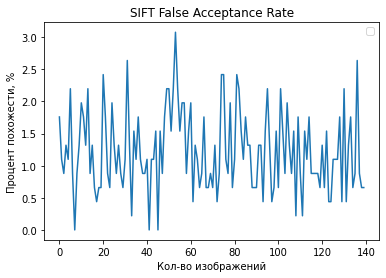

In [136]:
sift_FARs = [(i/sift_max_value)*100 for i in sFARs]


plt.plot(range(140), sift_FARs)
  
# naming the x axis
plt.xlabel('Кол-во изображений')
# naming the y axis
plt.ylabel('Процент похожести, %')
# giving a title to my graph
plt.title('SIFT False Acceptance Rate')
# show a legend on the plot
plt.legend()
# function to show the plot
plt.show()

In [110]:
sift_max_value = bf.knnMatch(descriptors1, descriptors1, k=2)
sift_max_value[1][0].distance

0.0

In [7]:
from scipy.interpolate import make_interp_spline

# Dataset
lens = range(140)
#sift_FAR = [(int(i)/sift_max_value)*100 for i in good_matches]
sift_x = np.array(lens)
sift_y = np.array(sift_FARs)
 
sift_X_Y_Spline = make_interp_spline(sift_x, sift_y)
 
# Returns evenly spaced numbers
# over a specified interval.
sift_X_ = np.linspace(sift_x.min(), sift_x.max(), 500)
sift_Y_ = sift_X_Y_Spline(sift_X_)
 
# Plotting the Graph
plt.plot(sift_X_, sift_Y_)
plt.xlabel('Кол-во изображений')
# naming the y axis
plt.ylabel('Процент похожести, %')
# giving a title to my graph
plt.title('SIFT False Acceptance Rate')
plt.show()

NameError: name 'sift_FARs' is not defined

In [ ]:
match = bf.match(descriptors1, descriptors)
single_match = match[0]
single_match.distance

37.0

In [ ]:
single_match = good_matches[0][0]
single_match.distance


matches = sorted(matches,key=lambda x:x.distance)
single_match

#orb_matches =cv2.drawMatches(imgs_list[0], keypoints1, imgs_list[-1], keypoints, single_match, None, flags=2)
#cv2.imwrite('C:\\Users\\imotw\\PycharmProjects\\diplom_matvey\\templates\\ident_first_template.png', orb_matches)

#plt.imshow(orb_matches)

<DMatch 000002B3D1A8AE90>

In [ ]:
sift = cv2.xfeatures2d.SIFT_create()
keypoints1, descriptors1 = sift.detectAndCompute(imgs_list[0], None)
keypoints2, descriptors2 = sift.detectAndCompute(imgs_list[65], None)

bf = cv2.BFMatcher()
matches = bf.knnMatch (descriptors1, descriptors2,k=2)

In [ ]:
good_matches = []

for m1, m2 in matches:
  if m1.distance < 0.6*m2.distance:
    good_matches.append([m1])

len(good_matches)

6

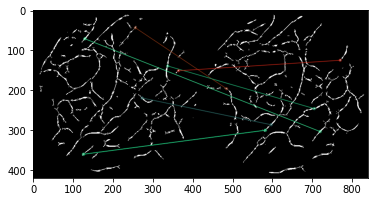

In [ ]:
len(good_matches)
SIFT_matches =cv2.drawMatchesKnn(imgs_list[0], keypoints1, imgs_list[3], keypoints2, good_matches, None, flags=2)
#cv2.imwrite('C:\\Users\\imotw\\PycharmProjects\\diplom_matvey\\templates\\ident_second_template.png', SIFT_matches)

plt.imshow(SIFT_matches)

FLAN descriptor


In [36]:
sift = cv2.xfeatures2d.SIFT_create()
keypoints_, descriptors_ = sift.detectAndCompute(imgs_list[0], None)

FLAN_INDEX_KDTREE = 0
index_params = dict (algorithm = FLAN_INDEX_KDTREE, trees=5)
search_params = dict (checks=50)
good_matches = []
flann = cv2.FlannBasedMatcher(index_params, search_params)

flann_match = flann.knnMatch(descriptors_, descriptors_, k=2)
for m1, m2 in flann_match:
    good_matches.append(m1)
flann_max_value = len(good_matches)

descriptors = []
matches = []
fFARs = []

lens = range(1, 150, 10)
good_matches.clear()
for img1, img2 in itertools.combinations(imgs_list[4:54], 2):
        
    keypoints, descriptor1 = sift.detectAndCompute(img1, None)
    keypoints2, descriptor2 = sift.detectAndCompute(img2, None)
    bf = cv2.BFMatcher()
    match = flann.knnMatch(descriptor1, descriptor2, k=2)    
    for m1, m2 in match:
        if m1.distance <= 0.6*m2.distance:
            good_matches.append(m1)
        
    fFARs.append(len(good_matches))
    good_matches.clear()



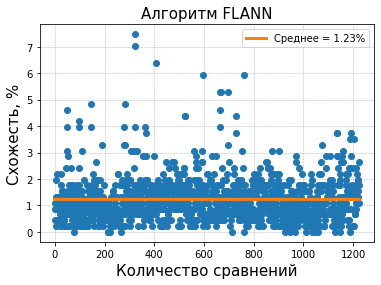

In [37]:
flann_FARs = [(i/flann_max_value)*100 for i in fFARs]

y_mean = [np.mean(flann_FARs)]*len(flann_FARs)

fig = plt.figure()

# Plot the data
plt.plot(flann_FARs, 'o')
plt.plot(y_mean, label=f'Среднее = {float("{:.2f}".format(y_mean[0]))}%', linewidth=3)
plt.grid( linestyle='--', linewidth=0.5)
# Plot the average line
#plt.plot(orb_FAR,y_mean, label='Mean', linestyle='--')


# naming the x axis
plt.ylabel('Схожесть, %',fontsize= 15)
# naming the y axis
plt.xlabel('Количество сравнений',fontsize= 15)
# giving a title to my graph
plt.title('Алгоритм FLANN',fontsize= 15)
# show a legend on the plot
plt.legend()
# function to show the plot
plt.show()
#plt.('C:\\Users\\imotw\\PycharmProjects\\diplom_matvey\\flann.pdf')
fig.savefig('FLANN_g.png', dpi = 100, facecolor='white')

In [74]:
len(flann_FARs)

1225

AttributeError: 'Figure' object has no attribute 'ylabel'

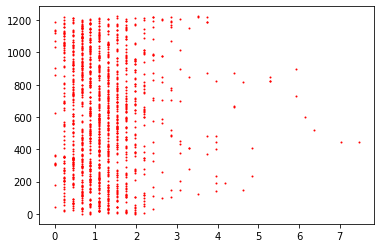

In [76]:
fig, ax = plt.subplots()

# ключ цвета из {'b', 'g', 'r', 'c', 'm', 'y', 'k', 'w'}:
plt.scatter(flann_FARs, range(1225),
           c = 'r',
           s = 1)

fig.ylabel('Проценты схожести, %')
# naming the y axis
fig.xlabel('Кол-во сравнений')

ax.set_title('Алгоритм FLANN')

#  Увеличим размер графика:
fig.set_figwidth(14)
fig.set_figheight(14)

plt.show()

In [56]:
from scipy.interpolate import make_interp_spline


flann_FARs = [(i/flann_max_value)*100 for i in fFARs]
lens = range(140)
#sift_FAR = [(int(i)/sift_max_value)*100 for i in good_matches]
flann_x = np.array(lens)
flann_y = np.array(flann_FARs)
 
flann_X_Y_Spline = make_interp_spline(flann_x, flann_y)
 
# Returns evenly spaced numbers
# over a specified interval.
flann_X_ = np.linspace(flann_x.min(), flann_x.max(), 500)
flann_Y_ = flann_X_Y_Spline(flann_X_)
 
# Plotting the Graph
plt.plot(flann_X_, flann_Y_)
plt.xlabel('Кол-во изображений')
# naming the y axis
plt.ylabel('Процент похожести, %')
# giving a title to my graph
plt.title('FLANN False Acceptance Rate')
plt.show()

ValueError: Shapes of x (140,) and y (1225,) are incompatible

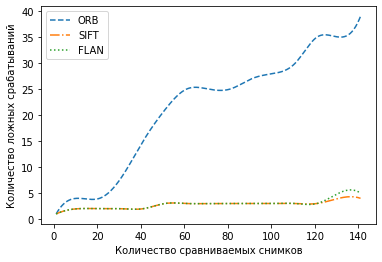

In [46]:
#ORB
 
plt.plot(orb_X_, orb_Y_,'--', label='ORB')
#SIFT
plt.plot(sift_X_, sift_Y_, '-.', label='SIFT')
#FLAN
plt.plot(flan_X_, flan_Y_, ':', label='FLAN')
plt.xlabel("Количество сравниваемых снимков")
plt.ylabel("Количество ложных срабатываний")
plt.legend()
plt.show()